# Ford GoBike Dataset Exploration
## by Mazen Khodier

## Preliminary Wrangling

> This dataset introduces a bike rental company called FordGoBike. Currently its name is BayWheels as it was changed in May 2019. This dataset is about trips made in 2019 using their service.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import glob

%matplotlib inline

In [2]:
# Loading 12 months of the data
files = ['201901-fordgobike-tripdata.csv',
              '201902-fordgobike-tripdata.csv',
              '201903-fordgobike-tripdata.csv',
              '201904-fordgobike-tripdata.csv',
              '201905-baywheels-tripdata.csv',
              '201906-baywheels-tripdata.csv',
              '201907-baywheels-tripdata.csv',
              '201908-baywheels-tripdata.csv',
              '201909-baywheels-tripdata.csv',
              '201910-baywheels-tripdata.csv',
              '201911-baywheels-tripdata.csv',
               '201912-baywheels-tripdata.csv']

In [3]:
# creating a dataframe for 2019 data
df = pd.concat([pd.read_csv(f,) for f in files], ignore_index=True)
df.head()

C:\Users\mazen_000\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3263: DtypeWarning: Columns (14) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):
C:\Users\mazen_000\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3263: DtypeWarning: Columns (13,14) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):
C:\Users\mazen_000\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3263: DtypeWarning: Columns (13) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip,rental_access_method
0,80825,2019-01-31 17:57:44.6130,2019-02-01 16:24:49.8640,229.0,Foothill Blvd at 42nd Ave,37.775745,-122.213037,196.0,Grand Ave at Perkins St,37.808894,-122.256460,4861,Subscriber,No,NaN
1,65900,2019-01-31 20:58:33.8860,2019-02-01 15:16:54.1730,4.0,Cyril Magnin St at Ellis St,37.785881,-122.408915,134.0,Valencia St at 24th St,37.752428,-122.420628,5506,Subscriber,No,NaN
2,62633,2019-01-31 18:06:52.9240,2019-02-01 11:30:46.5300,245.0,Downtown Berkeley BART,37.870139,-122.268422,157.0,65th St at Hollis St,37.846784,-122.291376,2717,Customer,No,NaN
3,44680,2019-01-31 19:46:09.7190,2019-02-01 08:10:50.3180,85.0,Church St at Duboce Ave,37.770083,-122.429156,53.0,Grove St at Divisadero,37.775946,-122.437777,4557,Customer,No,NaN
4,60709,2019-01-31 14:19:01.5410,2019-02-01 07:10:51.0650,16.0,Steuart St at Market St,37.794130,-122.394430,28.0,The Embarcadero at Bryant St,37.787168,-122.388098,2100,Customer,No,NaN


In [4]:
df.shape

(2506983, 15)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2506983 entries, 0 to 2506982
Data columns (total 15 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   duration_sec             int64  
 1   start_time               object 
 2   end_time                 object 
 3   start_station_id         float64
 4   start_station_name       object 
 5   start_station_latitude   float64
 6   start_station_longitude  float64
 7   end_station_id           float64
 8   end_station_name         object 
 9   end_station_latitude     float64
 10  end_station_longitude    float64
 11  bike_id                  int64  
 12  user_type                object 
 13  bike_share_for_all_trip  object 
 14  rental_access_method     object 
dtypes: float64(6), int64(2), object(7)
memory usage: 286.9+ MB


In [6]:
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id
count,2.506983e+06,2.426249e+06,2.506983e+06,2.506983e+06,2.424081e+06,2.506983e+06,2.506983e+06,2.506983e+06
mean,8.076483e+02,1.465047e+02,3.776506e+01,-1.223499e+02,1.427044e+02,3.776422e+01,-1.223459e+02,2.789833e+04
std,1.974714e+03,1.223171e+02,1.363698e-01,3.089648e-01,1.214296e+02,2.392885e-01,7.080417e-01,1.146067e+05
min,6.000000e+01,3.000000e+00,0.000000e+00,-1.225143e+02,3.000000e+00,0.000000e+00,-1.225143e+02,4.000000e+00
25%,3.590000e+02,4.700000e+01,3.776931e+01,-1.224130e+02,4.300000e+01,3.777003e+01,-1.224117e+02,1.952000e+03
50%,5.710000e+02,1.050000e+02,3.778053e+01,-1.223983e+02,1.010000e+02,3.778076e+01,-1.223981e+02,4.420000e+03
75%,8.870000e+02,2.430000e+02,3.779539e+01,-1.222914e+02,2.390000e+02,3.779587e+01,-1.222934e+02,9.682000e+03
max,9.121100e+05,4.980000e+02,4.551000e+01,0.000000e+00,4.980000e+02,4.551000e+01,0.000000e+00,9.999410e+05


In [7]:
# converting start_time and end_time into datetime format
df.start_time = pd.to_datetime(df.start_time)
df.end_time = pd.to_datetime(df.end_time)

In [8]:
# looking for null values
df.isnull().sum()

duration_sec                     0
start_time                       0
end_time                         0
start_station_id             80734
start_station_name           80133
start_station_latitude           0
start_station_longitude          0
end_station_id               82902
end_station_name             82350
end_station_latitude             0
end_station_longitude            0
bike_id                          0
user_type                        0
bike_share_for_all_trip     243259
rental_access_method       2386145
dtype: int64

In [9]:
# dropping columns with missing values as they are not of interest for our analysis
df.drop(columns = ['start_station_id', 'start_station_name', 'end_station_id', 'end_station_name',
                   'bike_share_for_all_trip', 'rental_access_method'] , inplace=True)
df.head()

,duration_sec,start_time,end_time,start_station_latitude,start_station_longitude,end_station_latitude,end_station_longitude,bike_id,user_type
0,80825,2019-01-31 17:57:44.613,2019-02-01 16:24:49.864,37.775745,-122.213037,37.808894,-122.256460,4861,Subscriber
1,65900,2019-01-31 20:58:33.886,2019-02-01 15:16:54.173,37.785881,-122.408915,37.752428,-122.420628,5506,Subscriber
2,62633,2019-01-31 18:06:52.924,2019-02-01 11:30:46.530,37.870139,-122.268422,37.846784,-122.291376,2717,Customer
3,44680,2019-01-31 19:46:09.719,2019-02-01 08:10:50.318,37.770083,-122.429156,37.775946,-122.437777,4557,Customer
4,60709,2019-01-31 14:19:01.541,2019-02-01 07:10:51.065,37.794130,-122.394430,37.787168,-122.388098,2100,Customer


In [10]:
# looking for duplicates
df.duplicated().sum()

0

In [11]:
# dropping addtional features that won't be of interest
df.drop(columns = ['start_station_latitude', 'start_station_longitude', 'end_station_latitude',
                   'end_station_longitude','bike_id',] , inplace=True)
df.head()

,duration_sec,start_time,end_time,user_type
0,80825,2019-01-31 17:57:44.613,2019-02-01 16:24:49.864,Subscriber
1,65900,2019-01-31 20:58:33.886,2019-02-01 15:16:54.173,Subscriber
2,62633,2019-01-31 18:06:52.924,2019-02-01 11:30:46.530,Customer
3,44680,2019-01-31 19:46:09.719,2019-02-01 08:10:50.318,Customer
4,60709,2019-01-31 14:19:01.541,2019-02-01 07:10:51.065,Customer


In [12]:
# adding a column for the day of the week at which a user started using the bike
df['day'] = df.start_time.dt.strftime('%a')

# adding a column for month at which a user started using the bike
df['month'] = df.start_time.dt.strftime('%B')

df.head()

,duration_sec,start_time,end_time,user_type,day,month
0,80825,2019-01-31 17:57:44.613,2019-02-01 16:24:49.864,Subscriber,Thu,January
1,65900,2019-01-31 20:58:33.886,2019-02-01 15:16:54.173,Subscriber,Thu,January
2,62633,2019-01-31 18:06:52.924,2019-02-01 11:30:46.530,Customer,Thu,January
3,44680,2019-01-31 19:46:09.719,2019-02-01 08:10:50.318,Customer,Thu,January
4,60709,2019-01-31 14:19:01.541,2019-02-01 07:10:51.065,Customer,Thu,January


### What is the structure of your dataset?

> This data set is about trips made in 2019 using Ford GoBike services. The dataset has a multitude of features including: stations of renting bikes and returning them with locations, exact times of such rentals and returinings, unique bikes ids, rental access methods, etc. Some data wrangling and cleaning were performed resulting in leaving the following features only: <br/>
   * **`duration_sec:`** time in seconds from renting the bike till returning it
   * **`start_time:`** exact time of renting the bike
   * **`end_time:`** exact time of returning the bike
   * **`user_type:`** day of renting the bike (Binary Categorical Variable)
   * **`day:`** month of renting the bike (Categorical Variable)
   * **`month:`** determine whether the user is frequent subscriber to the service or a casual customer (Categorical Variable)
    

### What is/are the main feature(s) of interest in your dataset?

> Probably the **`start_time`** and **`end_time`** as they show which months, days and even hours in which people are more likely to rent a bike and which aren't.


### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> Probably **`start_time`**, **`end_time`** and **`duration_sec`**. Also, **`user_type`** will be investigated for figuring out patterns distinguishing each of subscribers and customers

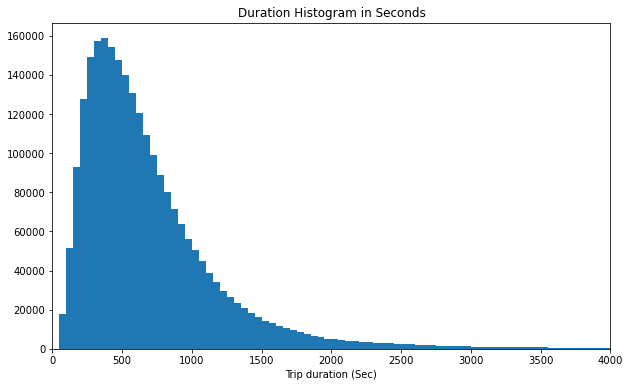

In [13]:
plt.figure(figsize = (10,6))
plt.hist(data=df, x='duration_sec', bins=np.arange(0, df.duration_sec.max() + 100 , 50));
plt.xlim(0,4000);
plt.xlabel('Trip duration (Sec)');
plt.title('Duration Histogram in Seconds');

There appears to be a very large amount of bins regarding duration in seconds. Thus, We will add a feature for duration of trips in minutes instead.

In [14]:
df['duration_min'] = df['duration_sec'] / 60
df.head()

,duration_sec,start_time,end_time,user_type,day,month,duration_min
0,80825,2019-01-31 17:57:44.613,2019-02-01 16:24:49.864,Subscriber,Thu,January,1347.083333
1,65900,2019-01-31 20:58:33.886,2019-02-01 15:16:54.173,Subscriber,Thu,January,1098.333333
2,62633,2019-01-31 18:06:52.924,2019-02-01 11:30:46.530,Customer,Thu,January,1043.883333
3,44680,2019-01-31 19:46:09.719,2019-02-01 08:10:50.318,Customer,Thu,January,744.666667
4,60709,2019-01-31 14:19:01.541,2019-02-01 07:10:51.065,Customer,Thu,January,1011.816667


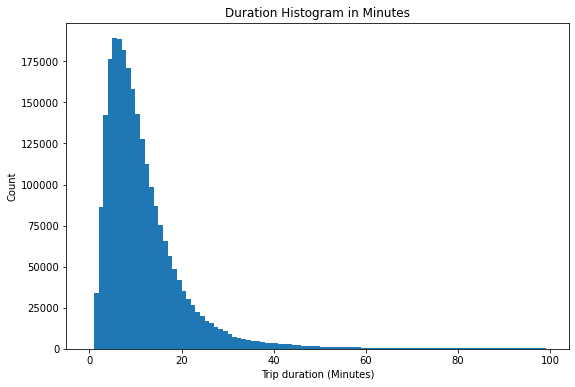

In [15]:
plt.figure(figsize=(9,6));
plt.hist(data=df, x='duration_min', bins=np.arange(100));
# plt.xlim(0,3000);
plt.xlabel('Trip duration (Minutes)');
plt.ylabel('Count');
plt.title('Duration Histogram in Minutes');

In [16]:
df['duration_min'].describe()

count    2.506983e+06
mean     1.346081e+01
std      3.291190e+01
min      1.000000e+00
25%      5.983333e+00
50%      9.516667e+00
75%      1.478333e+01
max      1.520183e+04
Name: duration_min, dtype: float64

The average duration of a single trip appears to be around 13 minutes and most trips take between 5 minutes and 14 minutes (interquartile range). This is indeed in accordance with what one might expect as the vehicle used here is just a bike and is well-suited for short distances.

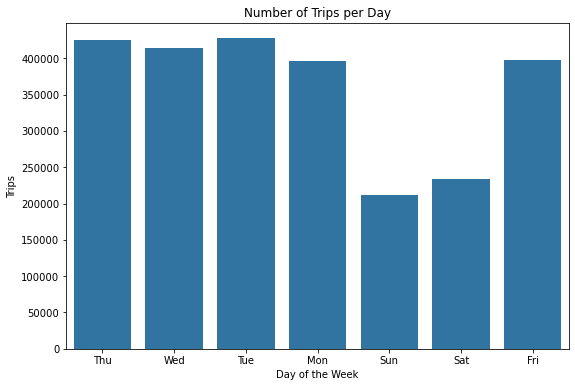

In [17]:
plt.figure(figsize=(9,6));
base_color = sb.color_palette()[0]
sb.countplot(data = df, x = 'day', color = base_color);
plt.title('Number of Trips per Day');
plt.xlabel('Day of the Week');
plt.ylabel('Trips');

It is evident that most trips take place in days from Monday to Friday while the number of trips in weekends (Saturday and Sunday) are significantly lower. This may suggest that this is due to the fact that many people use bikes for commuting to and from work over the whole week and instead rest on their days off. (weekends)

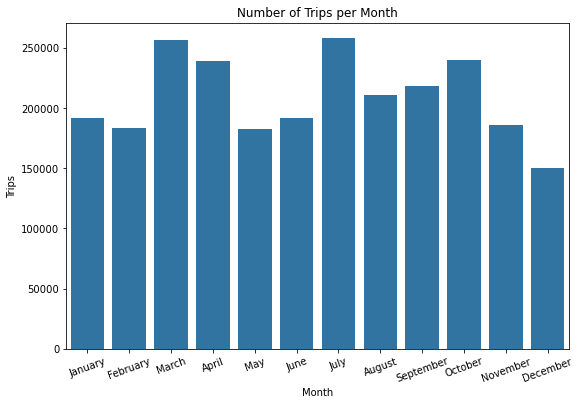

In [18]:
plt.figure(figsize=(9,6));
sb.countplot(data=df, x='month', color=base_color);
plt.title('Number of Trips per Month');
plt.xlabel('Month');
plt.ylabel('Trips');
plt.xticks(rotation=20);

> San Francisco's climate is "Summer (Jun–Aug) is warm and dry, with chilly fog in the mornings and evenings. Winter (Dec–Feb) is cool and rainy." Source: National Oceanic and Atmospheric Adminsistration (NOAA)

Even with the information above, I can't see exactly why March, July and October would have the highest number of Trips as they are of different climates. It may simply be an accident.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> One might be tempted to draw conclusions early that agree with his assumptions. Regardless, in this section we found out that trips are more frequent during work days, trips usually last around 13 minutes and invetsigated the relation of months with the number of trips. Also, a new feature **`duration_min`** was added as it was more convenient than **`duration_sec`**.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?
> There seemed to be no correlation between the number of trips and the month. I thought that seasons changing and weather may have had an effect on the number of trips.
 

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

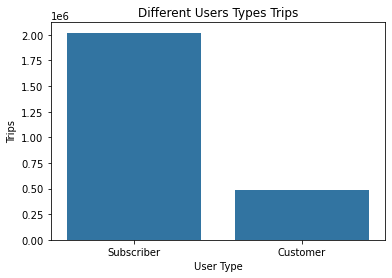

In [19]:
sb.countplot(data=df, x='user_type', color=base_color);
plt.title('Different Users Types Trips');
plt.xlabel('User Type');
plt.ylabel('Trips');

In [20]:
df.user_type.value_counts()

Subscriber    2021166
Customer       485817
Name: user_type, dtype: int64

It is clear that there is much more subscribers than Customers. More than 5 times!

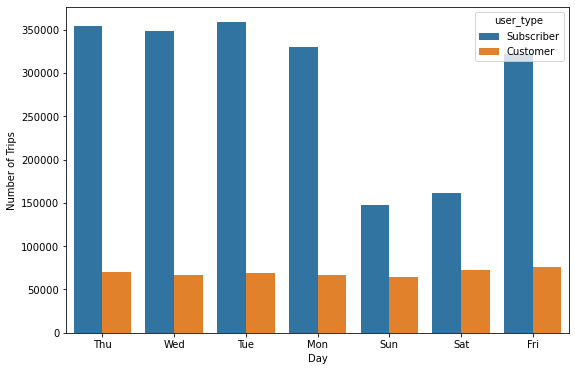

In [21]:
plt.figure(figsize=(9,6));
sb.countplot(data=df, x='day', hue='user_type');
plt.xlabel('Day');
plt.ylabel('Number of Trips');

* We can see that for subscribers, workdays are the busiest while weekends are more free. This further strengthens our assumption that this may be due to the fact that they use this service for renting bikes for commuting.
* On the other hand, Customers are more equally distributed over all days and don't seem to show any intersting pattern or trend.

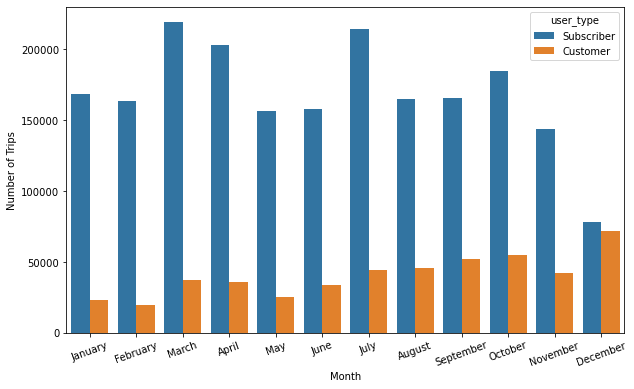

In [22]:
plt.figure(figsize=(10,6));
sb.countplot(data=df, x='month', hue='user_type');
plt.xlabel('Month');
plt.ylabel('Number of Trips');
plt.xticks(rotation=20);

Again, there doesn't quite seem to be a pattern in regards to the months. However, upon closer inspection we can see that the maximum number of trips occurs in December for customers. This may suggest that tourists visit San Francisco during the winter. However, without any further data we cannot say that for sure.

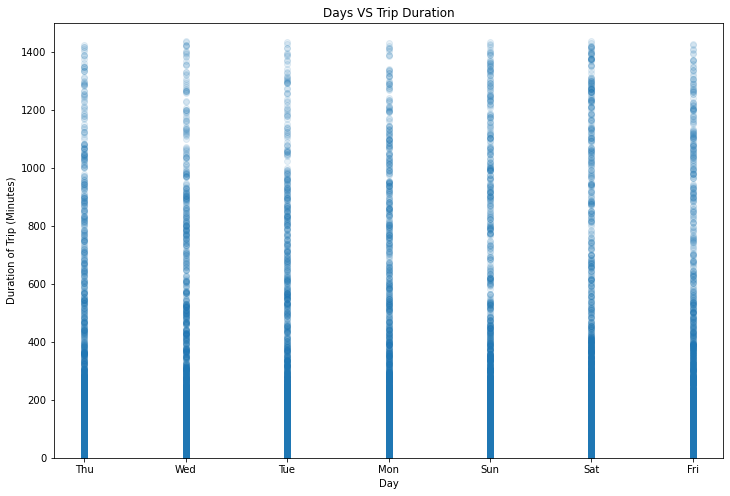

In [23]:
plt.figure(figsize = (12,8));
plt.scatter(data=df, x='day', y='duration_min', alpha=0.1);
plt.title('Days VS Trip Duration');
plt.xlabel('Day');
plt.ylabel('Duration of Trip (Minutes)');
plt.ylim(0,1500);

All days has at least 300 minutes with Sunday and Saturday having the longest trips.This may suggest that even though trips on weekend days are less frequent, they are on average longer than on workdays.

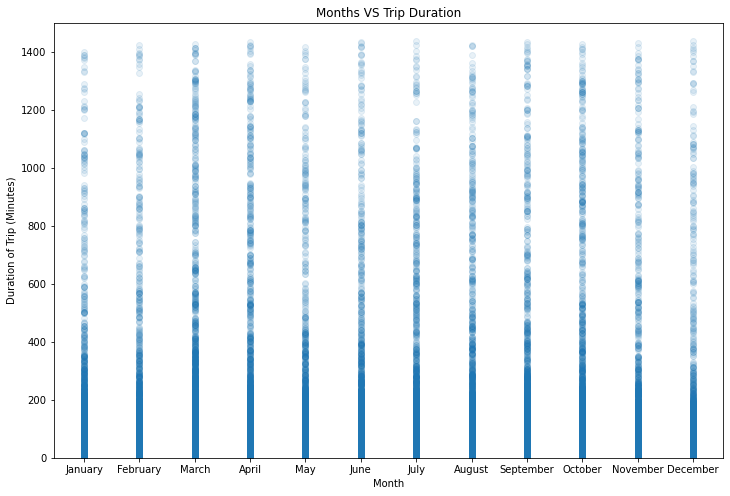

In [24]:
plt.figure(figsize = (12,8));
plt.scatter(data=df, x='month', y='duration_min', alpha=0.1);
plt.title('Months VS Trip Duration');
plt.xlabel('Month');
plt.ylabel('Duration of Trip (Minutes)');
plt.ylim(0,1500);

All months has at least 300 minutes with June and July having the longest trips. Meanwhile, January and December had shorter trips on average. This may suggest that people like having long drives in the summer more than in winter one due to weather conditions.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> We saw that there seems to be quite the difference in number of trips made by customers and subscribers. This may imply that most people who use the service are satisfied with it as they use it frequently. Also, there seemed to be some differences between customers and subscribers to the service. The subscribers seemed to have some interesting underlying patterns while customers were more random. 

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> We saw that weekends had longer trips on average than on work days even though most people use the service on work days. Also, seasons seemed to affect ride durations hinting at the effect of weather conditions on people riding bikes or not.

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

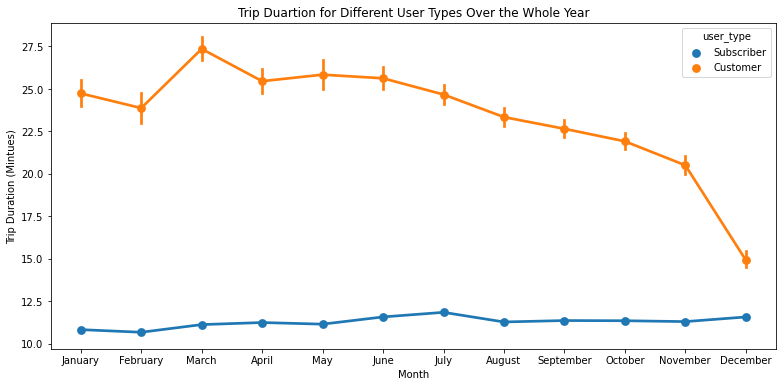

In [25]:
plt.figure(figsize = (13,6));
sb.pointplot(data=df, x='month', y='duration_min', hue='user_type');
plt.title('Trip Duartion for Different User Types Over the Whole Year');
plt.ylabel('Trip Duration (Mintues)');
plt.xlabel('Month');
plt.show();

Evidently, Customers have longer trip duration than Subscribers. This again may imply that most subscribers only use this service for commuting.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Yes, this last investigation strengthened the possibility of subcsribers being commuters even more while customers are more random and don't seem to have some sort of underlying pattern suggesting they may be tourists.

### Were there any interesting or surprising interactions between features?

> Personally, it baffled me a little at first that customers would have longer trips than subscribers but after thinking about it, it seemed to make sense. Customers maybe only using the service once but they are probably in need of it during that time for quite a while.